In [1]:
import matplotlib.pylab as plt
import os
import cv2 as cv
from tqdm import tqdm



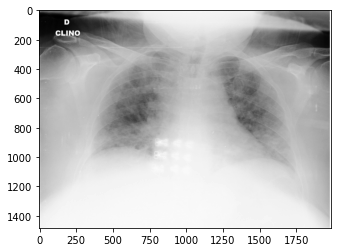

In [2]:
DATADIR = "images"
CATEGORIES = ["covid", "healthy"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img = cv.imread(os.path.join(path, img), cv.IMREAD_GRAYSCALE)
        plt.imshow(img, cmap="gray")
        plt.show()
        break
    break


In [3]:
MAX_SAMPELS = 460
IMG_SIZE = 300


In [4]:
training_data = []


def create_training_data():
    for category in CATEGORIES: 

        path = os.path.join(DATADIR, category)  
        class_num = CATEGORIES.index(category)
        i = 0
        for img in tqdm(os.listdir(path)): 
            if i > MAX_SAMPELS:
                break
            try:
                img_array = cv.imread(os.path.join(
                    path, img), cv.IMREAD_GRAYSCALE)  # convert to array
                # resize to normalize data size
                new_array = cv.resize(img_array, (IMG_SIZE, IMG_SIZE))
                # add this to our training_data
                training_data.append([new_array, class_num])
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            i+=1
            


create_training_data()

print(len(training_data))


 11%|█▏        | 461/4022 [00:11<01:30, 39.32it/s]

911


In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
import random
random.shuffle(training_data)


X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=.1)
print(len(y_test))

92


In [6]:
import pickle

pickle_out = open("x_train.pickle","wb")
pickle.dump(x_train, pickle_out)
pickle_out.close()

pickle_out = open("x_test.pickle","wb")
pickle.dump(x_test, pickle_out)
pickle_out.close()

pickle_out = open("y_train.pickle","wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

pickle_out = open("y_test.pickle","wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()

In [7]:

pickle_in = open("x_train.pickle","rb")
x_train = pickle.load(pickle_in)

pickle_in = open("x_test.pickle","rb")
x_test = pickle.load(pickle_in)

pickle_in = open("y_train.pickle","rb")
y_train = pickle.load(pickle_in)

pickle_in = open("y_test.pickle","rb")
y_test = pickle.load(pickle_in)